<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Self-adjoint-freely-independent-matrix-recovery" data-toc-modified-id="Self-adjoint-freely-independent-matrix-recovery-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Self-adjoint freely-independent matrix recovery</a></span><ul class="toc-item"><li><span><a href="#Orthogonal-mixing-matrix" data-toc-modified-id="Orthogonal-mixing-matrix-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Orthogonal mixing matrix</a></span><ul class="toc-item"><li><span><a href="#Kurtosis-based-FCF" data-toc-modified-id="Kurtosis-based-FCF-1.1.1"><span class="toc-item-num">1.1.1&nbsp;&nbsp;</span>Kurtosis-based FCF</a></span></li><li><span><a href="#Entropy-based-FCF" data-toc-modified-id="Entropy-based-FCF-1.1.2"><span class="toc-item-num">1.1.2&nbsp;&nbsp;</span>Entropy-based FCF</a></span></li></ul></li><li><span><a href="#General-mixing-matrix" data-toc-modified-id="General-mixing-matrix-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>General mixing matrix</a></span></li><li><span><a href="#Three-components-example" data-toc-modified-id="Three-components-example-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Three components example</a></span></li><li><span><a href="#Identifiability-condition:-FCF-fails-when-there-are-multiple-GOEs." data-toc-modified-id="Identifiability-condition:-FCF-fails-when-there-are-multiple-GOEs.-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Identifiability condition: FCF fails when there are multiple GOEs.</a></span></li></ul></li><li><span><a href="#Rectangular-freely-independent-matrix-recovery" data-toc-modified-id="Rectangular-freely-independent-matrix-recovery-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Rectangular freely-independent matrix recovery</a></span><ul class="toc-item"><li><span><a href="#Orthogonal-mixing-matrix" data-toc-modified-id="Orthogonal-mixing-matrix-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Orthogonal mixing matrix</a></span><ul class="toc-item"><li><span><a href="#Kurtosis-based-FCF" data-toc-modified-id="Kurtosis-based-FCF-2.1.1"><span class="toc-item-num">2.1.1&nbsp;&nbsp;</span>Kurtosis-based FCF</a></span></li><li><span><a href="#Entropy-based-FCF" data-toc-modified-id="Entropy-based-FCF-2.1.2"><span class="toc-item-num">2.1.2&nbsp;&nbsp;</span>Entropy-based FCF</a></span></li></ul></li><li><span><a href="#General-mixing-matrix" data-toc-modified-id="General-mixing-matrix-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>General mixing matrix</a></span></li><li><span><a href="#Three-components-example" data-toc-modified-id="Three-components-example-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Three components example</a></span></li><li><span><a href="#Identifiability-condition:-FCF-fails-when-there-are-multiple-Poisson-elements" data-toc-modified-id="Identifiability-condition:-FCF-fails-when-there-are-multiple-Poisson-elements-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Identifiability condition: FCF fails when there are multiple Poisson elements</a></span></li></ul></li></ul></div>

In [1]:
using Plots
gr(
    label="",
    markerstrokecolor="white",
    alpha=0.7,
    markerstrokewidth=0.3,
    color="black"
)

Plots.GRBackend()

In [2]:
include("../src/free_whiten.jl")
include("../src/loss.jl")
include("../src/fcf.jl")
include("../src/gradient.jl")

grad_sum_free_ent (generic function with 1 method)

In [3]:
push!(LOAD_PATH, "../src")

4-element Array{String,1}:
 "@"      
 "@v#.#"  
 "@stdlib"
 "../src" 

In [4]:
using fca, LinearAlgebra

┌ Info: Recompiling stale cache file /Users/haowurm/.julia/compiled/v1.0/fca.ji for fca [top-level]
└ @ Base loading.jl:1190


# Self-adjoint freely-independent matrix recovery

## Orthogonal mixing matrix

In [5]:
# orthogonal mixing matrix
N = 500
G1, G2 = randn(N, N), randn(N, 2N);
X1, X2 = (G1 + G1') / sqrt(2*N), (G2 * G2') / (2*N)
X1 = free_whiten([X1]; mat_type = "her")[1][1]
X2 = free_whiten([X2]; mat_type = "her")[1][1]
X = [X1, X2];
Q = Matrix(qr(randn(2,2)).Q)
Z = Q*X;

### Kurtosis-based FCF

In [6]:
# find the mixing matrix
@time Qest, _ = freecf(Z)

# Qest should estimate the Q, 
# thus inv(Qest)*Q should be close to I (up to permutation and column sign flip)
@show pinv(Qest)*Q;

UndefVarError: UndefVarError: Optim not defined

 27.046186 seconds (42.28 M allocations: 6.155 GiB, 9.47% gc time)


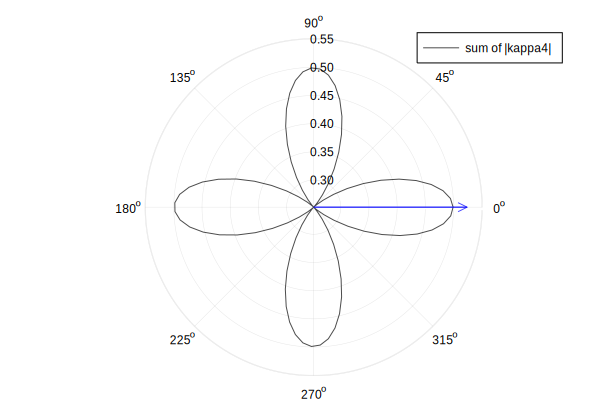

In [5]:
# the direction found by maximize sum of absolute value of free kurtosis
# does recover the free component
θ_range = range(0, stop = 2π, length = 100)
@time plot(θ -> -neg_abs_sum_free_kurt([cos(θ) sin(θ); -sin(θ) cos(θ)]*X), 
    θ_range, proj=:polar, label="sum of |kappa4|")
y1, y2 = ylims()
plot!([0, 0], [y1, y2], seriestype=:path, proj=:polar, arrow=0.2, color=:blue)

### Entropy-based FCF

In [6]:
# find the mixing matrix
@time Qest, _ = freecf(Z; obj_type ="ent")

# Qest should estimate the Q, 
# thus inv(Qest)*Q should be close to I (up to permutation and column sign flip)
@show pinv(Qest)*Q;

 23.528820 seconds (61.71 M allocations: 3.862 GiB, 7.96% gc time)
pinv(Qest) * Q = [0.999997 0.000867009; -0.00408736 1.0]


 10.185389 seconds (100.65 M allocations: 5.861 GiB, 17.44% gc time)


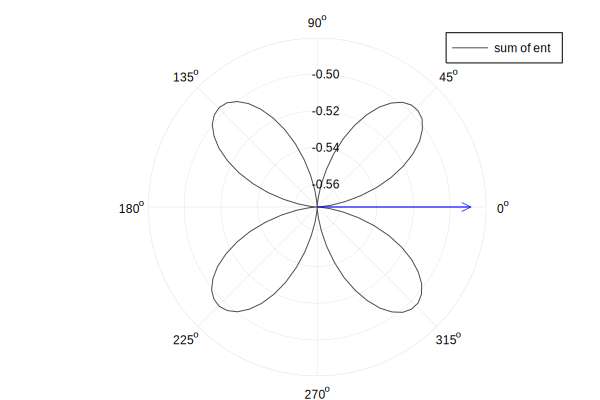

In [7]:
# the direction found by minimize sum of free entropy
# does recover the free component
# Note that the value is negative in this plot
θ_range = range(0, stop = 2π, length = 100)
@time plot(θ -> sum_free_ent([cos(θ) sin(θ); -sin(θ) cos(θ)]*X), 
    θ_range, proj=:polar, label="sum of ent")
y1, y2 = ylims()
plot!([0, 0], [y1, y2], seriestype=:path, proj=:polar, arrow=0.2, color=:blue)

## General mixing matrix

In [8]:
# general mixing matrix
N = 500
G1, G2 = randn(N, N), randn(N, 2N);
X1, X2 = (G1 + G1') / sqrt(2*N), (G2 * G2') / (2*N)
X1 = free_whiten([X1]; mat_type = "her")[1][1]
X2 = free_whiten([X2]; mat_type = "her")[1][1]
X = [X1, X2];
A = randn(2,2)
Z = A*X

2-element Array{Array{Float64,2},1}:
 [0.1224 0.0403311 … 0.125761 -0.0578442; 0.0403311 -0.11556 … -0.0335826 -0.104909; … ; 0.125761 -0.0335826 … -0.0178708 -0.0909203; -0.0578442 -0.104909 … -0.0909203 -0.0096888]              
 [0.0103839 0.00661738 … 0.0149457 -0.0113533; 0.00661738 -0.0190207 … -0.00550944 -0.00581772; … ; 0.0149457 -0.00550944 … 0.00205017 -0.010015; -0.0113533 -0.00581772 … -0.010015 -0.00228129]

In [9]:
# find the mixing matrix using kurtosis-based FCF
@time Aest, _ = freecf(Z)

# Aest should estimate the A, 
# thus inv(Aest)*A should be close to I (up to permutation and column sign flip)
@show pinv(Aest)*A;

 15.474747 seconds (2.45 k allocations: 2.433 GiB, 7.47% gc time)
pinv(Aest) * A = [0.0143274 -0.999812; -0.999915 -0.0202946]


In [10]:
# find the mixing matrix using entropy-based FCF
@time Aest, _ = freecf(Z; obj_type = "ent")

# Aest should estimate the A, 
# thus inv(Aest)*A should be close to I (up to permutation and column sign flip)
@show pinv(Aest)*A;

 46.943282 seconds (128.06 M allocations: 8.418 GiB, 8.17% gc time)
pinv(Aest) * A = [-0.00355236 -1.00001; -1.00001 -0.00241574]


## Three components example

In [51]:
N = 500
G1, G2, G3 = randn(N, N), randn(N, 2N), randn(N, 3*N);
X1, X2, X3 = (G1 + G1') / sqrt(2*N), (G2 * G2') / (2*N), (G3 * G3') / (3*N)
X1 = free_whiten([X1], mat_type = "her")[1][1]
X2 = free_whiten([X2], mat_type = "her")[1][1]
X3 = free_whiten([X3], mat_type = "her")[1][1]
X = [X1, X2, X3]
A = randn(3,3)
Z = A*X

3-element Array{Array{Float64,2},1}:
 [0.0984282 -0.00318597 … -0.0079876 0.00727004; -0.00318597 -0.070265 … -0.0265552 0.00940898; … ; -0.0079876 -0.0265552 … -0.00237848 -0.0132703; 0.00727004 0.00940898 … -0.0132703 0.00497741]
 [-0.0177575 0.0205285 … 0.0279972 -0.0254289; 0.0205285 0.243522 … 0.0910102 0.053873; … ; 0.0279972 0.0910102 … 0.0618402 0.110359; -0.0254289 0.053873 … 0.110359 0.103431]                    
 [0.035047 0.0542089 … 0.0225008 0.00499988; 0.0542089 0.108059 … 0.0248695 0.0634495; … ; 0.0225008 0.0248695 … -0.0832689 0.126539; 0.00499988 0.0634495 … 0.126539 0.116056]                   

In [52]:
# find the mixing matrix using kurtosis-based FCF
@time Aest, _ = freecf(Z)

# Aest should estimate the A, 
# thus inv(Aest)*A should be close to I (up to permutation and column sign flip)
@show pinv(Aest)*A;

207.662444 seconds (26.18 k allocations: 28.673 GiB, 5.53% gc time)
pinv(Aest) * A = [-0.0135814 -0.00337739 -0.999942; 0.999884 -0.00969976 -0.0116267; 0.00749853 0.999957 0.000482507]


In [13]:
# find the mixing matrix using entropy-based FCF
@time Aest, _ = freecf(Z; obj_type = "ent")

# Aest should estimate the A, 
# thus inv(Aest)*A should be close to I (up to permutation and column sign flip)
@show pinv(Aest)*A;

525.423462 seconds (1.46 G allocations: 88.935 GiB, 6.99% gc time)
pinv(Aest) * A = [-0.708434 -0.539607 0.455493; -0.0325307 0.672002 0.73739; -0.70505 0.507205 -0.498816]


## Identifiability condition: FCF fails when there are multiple GOEs.

In [14]:
N = 500
G1, G2 = randn(N, N), randn(N, N)
X1, X2 = (G1 + G1') / sqrt(2*N), (G2 + G2') / sqrt(2*N)
X1 = free_whiten([X1]; mat_type = "her")[1][1]
X2 = free_whiten([X2]; mat_type = "her")[1][1]
X = [X1, X2]
Q = Matrix(qr(randn(2,2)).Q)
Z = Q*X

2-element Array{Array{Float64,2},1}:
 [-0.0550559 -0.0213108 … 0.0328189 0.0677926; -0.0213108 0.0553171 … -0.0562658 0.0298067; … ; 0.0328189 -0.0562658 … -0.0454283 -0.0126163; 0.0677926 0.0298067 … -0.0126163 0.00870173]
 [0.0994377 0.0276413 … -0.108588 -0.020416; 0.0276413 0.0160508 … 0.0463432 0.053025; … ; -0.108588 0.0463432 … 0.0529453 -0.0182028; -0.020416 0.053025 … -0.0182028 -0.026571]         

In [15]:
# find the mixing matrix using kurtosis-based FCF
@time Qest, _ = freecf(Z)

# Qest fail to recover Q, 
@show pinv(Qest)*Q;

 27.665238 seconds (4.31 k allocations: 4.459 GiB, 6.73% gc time)
pinv(Qest) * Q = [-0.480136 -0.876188; 0.877196 -0.481974]


  4.915155 seconds (334.56 k allocations: 4.114 GiB, 16.58% gc time)


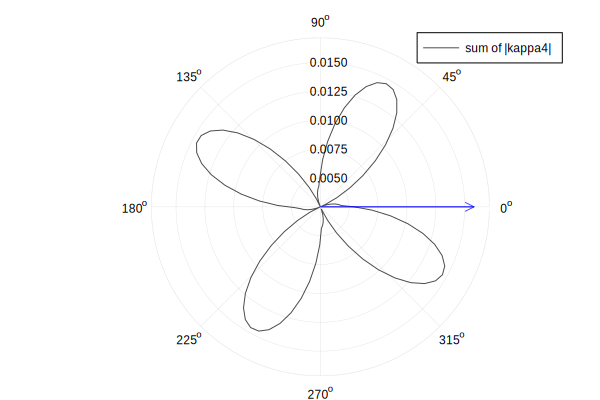

In [16]:
# the direction found by maximize sum of absolute value of free kurtosis
# fail to recover the free component. The reason is that the kurtosis of both 
# components are close to zero. The maximizer depends on the fluctuation
θ_range = range(0, stop = 2π, length = 100)
@time plot(θ -> -neg_abs_sum_free_kurt([cos(θ) sin(θ); -sin(θ) cos(θ)]*X), 
    θ_range, proj=:polar, label="sum of |kappa4|")
y1, y2 = ylims()
plot!([0, 0], [y1, y2], seriestype=:path, proj=:polar, arrow=0.2, color=:blue)

In [17]:
# find the mixing matrix using entropy-based FCF
@time Qest, _ = freecf(Z; obj_type = "ent")

# Qest fail to recover Q, 
@show pinv(Qest)*Q;

 32.257553 seconds (85.04 M allocations: 5.661 GiB, 8.45% gc time)
pinv(Qest) * Q = [0.987607 0.154891; -0.156961 0.987934]


 11.457275 seconds (100.34 M allocations: 5.846 GiB, 15.42% gc time)


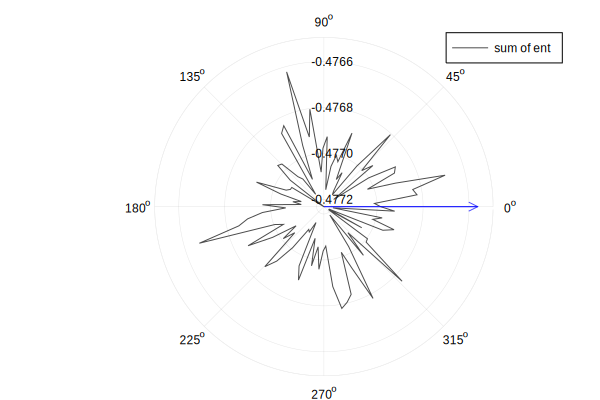

In [18]:
# The direction found by minimize sum of free entropy
# does recover the free component.
# The reason is that free entropys of all direction are close
# the maximizer depends on the fluctuation.
θ_range = range(0, stop = 2π, length = 100)
@time plot(θ -> sum_free_ent([cos(θ) sin(θ); -sin(θ) cos(θ)]*X), 
    θ_range, proj=:polar, label="sum of ent")
y1, y2 = ylims()
plot!([0, 0], [y1, y2], seriestype=:path, proj=:polar, arrow=0.2, color=:blue)

# Rectangular freely-independent matrix recovery

## Orthogonal mixing matrix

In [1]:
# orthogonal mixing matrix
N, M = 200, 300
X1 = randn(N, M) / sqrt(M)
X1 = free_whiten([X1], mat_type = "rec")[1][1]
U, V = Matrix(qr(randn(N,N)).Q), Matrix(qr(randn(M,M)).Q)
D = [Diagonal((collect(range(1,stop = 0,length = N)) .- 1).^4) zeros(N, M - N)]
X2 = U*D*V'
X2 = free_whiten([X2], mat_type = "rec")[1][1]
X = [X1, X2];
Q = Matrix(qr(randn(2,2)).Q) 
Z = Q*X

UndefVarError: UndefVarError: free_whiten not defined

### Kurtosis-based FCF

In [20]:
# find the mixing matrix
@time Qest, _ = freecf(Z, mat_type = "rec")

# Qest should estimate the Q, 
# thus inv(Qest)*Q should be close to I (up to permutation and column sign flip)
@show pinv(Qest)*Q;

 43.853114 seconds (10.36 k allocations: 4.754 GiB, 5.38% gc time)
pinv(Qest) * Q = [1.0 -0.000792126; -0.00142804 1.0]


  9.069953 seconds (334.57 k allocations: 7.094 GiB, 31.47% gc time)


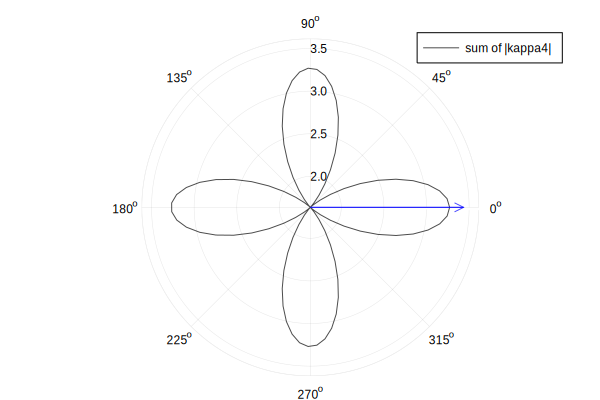

In [21]:
# the direction found by maximize sum of absolute value of free kurtosis
# does recover the free component
θ_range = range(0, stop = 2π, length = 100)
@time plot(θ -> -neg_abs_sum_free_kurt([cos(θ) sin(θ); -sin(θ) cos(θ)]*X), 
    θ_range, proj=:polar, label="sum of |kappa4|")
y1, y2 = ylims()
plot!([0, 0], [y1, y2], seriestype=:path, proj=:polar, arrow=0.2, color=:blue)

### Entropy-based FCF

In [22]:
# find the mixing matrix
@time Qest, _ = freecf(Z; obj_type = "ent", mat_type = "rec")

# Qest should estimate the Q, 
# thus inv(Qest)*Q should be close to I (up to permutation and column sign flip)
@show pinv(Qest)*Q;

361.661249 seconds (750.85 M allocations: 78.546 GiB, 11.17% gc time)
pinv(Qest) * Q = [-5.93817e-10 1.0; -1.0 0.00222017]


 18.240994 seconds (100.35 M allocations: 9.221 GiB, 18.81% gc time)


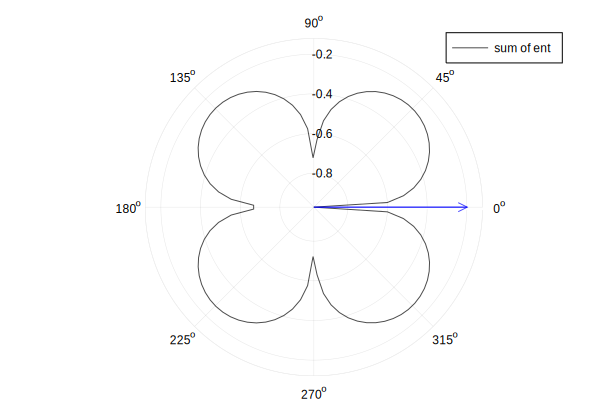

In [23]:
# the direction found by minimize sum of free entropy
# does recover the free component
# Note that the value is negative in this plot
θ_range = range(0, stop = 2π, length = 100)
@time plot(θ -> sum_free_ent([cos(θ) sin(θ); -sin(θ) cos(θ)]*X, mat_type = "rec"), 
    θ_range, proj=:polar, label="sum of ent")
y1, y2 = ylims()
plot!([0, 0], [y1, y2], seriestype=:path, proj=:polar, arrow=0.2, color=:blue)

## General mixing matrix

In [4]:
# general mixing matrix
N, M = 200, 300
X1 = randn(N, M) / sqrt(M)
X1 = free_whiten([X1], mat_type = "rec")[1][1]
U, V = Matrix(qr(randn(N,N)).Q), Matrix(qr(randn(M,M)).Q)
D = [Diagonal((collect(range(1,stop = 0,length = N)) .- 1).^4) zeros(N, M - N)]
X2 = U*D*V'
X2 = free_whiten([X2], mat_type = "rec")[1][1]
X = [X1, X2];
A = randn(2,2)
Z = A*X

2-element Array{Array{Float64,2},1}:
 [0.0225586 -0.0688272 … -0.0224129 -0.0428004; 0.0162589 0.021665 … 0.0100336 -0.00699876; … ; -0.045156 -0.0208699 … -0.0538446 -0.039805; -0.00878682 -0.0565271 … 0.00700445 -0.0920757]
 [-0.174273 0.0226341 … -0.107435 0.000581378; -0.0406036 -0.0732976 … -0.029512 0.258583; … ; -0.0366021 0.0868236 … -0.0771036 -0.081177; 0.0520192 0.119589 … -0.0795453 -0.00960553]    

In [7]:
# find the mixing matrix using kurtosis-based FCF
@time Aest, _ = freecf(Z, mat_type = "rec")

# Qest should estimate the A, 
# thus inv(Aest)*A should be close to I (up to permutation and column sign flip)
@show pinv(Aest)*A;

  2.490308 seconds (2.40 k allocations: 529.962 MiB, 3.38% gc time)
pinv(Aest) * A = [-0.999998 -0.0021027; 0.00205386 -0.999998]


In [8]:
# find the mixing matrix using entropy-based FCF
@time Aest, _ = freecf(Z, obj_type = "ent", mat_type = "rec")

# Qest should estimate the A, 
# thus inv(Aest)*A should be close to I (up to permutation and column sign flip)
@show pinv(Aest)*A;

 45.955953 seconds (120.19 M allocations: 11.384 GiB, 6.80% gc time)
pinv(Aest) * A = [-1.02028e-8 1.0; -1.0 -4.88442e-5]


## Three components example

In [27]:
N, M = 200, 300

X1 = randn(N, M) / sqrt(M)
X1 = free_whiten([X1], mat_type = "rec")[1][1]

U2, V2 = Matrix(qr(randn(N,N)).Q), Matrix(qr(randn(M,M)).Q)
D2 = [Diagonal((collect(range(1,stop = 0,length = N)) .- 1).^4) zeros(N, M - N)]
X2 = U2*D2*V2'
X2 = free_whiten([X2], mat_type = "rec")[1][1]

U3, V3 = Matrix(qr(randn(N,N)).Q), Matrix(qr(randn(M,M)).Q)
D3 = [Diagonal((collect(range(1,stop = 0,length = N)) .- 2).^4) zeros(N, M - N)]
X3 = U3*D3*V3'
X3 = free_whiten([X3], mat_type = "rec")[1][1]

X = [X1, X2, X3];
A = randn(3,3)
Z = A*X

3-element Array{Array{Float64,2},1}:
 [0.101897 0.0106999 … -0.07804 0.0107941; -0.0139878 -0.0337941 … 0.0258595 0.124059; … ; 0.0126378 -0.000144934 … 0.000896246 0.0189281; 0.0187345 0.0414826 … 0.0229457 0.0111844]        
 [-0.0163441 -0.000444926 … 0.0655851 -0.10041; -0.0970406 0.246544 … 0.00732625 -0.218566; … ; -0.0992296 0.123708 … -0.0205784 -0.0500154; -0.00977312 -0.112143 … 0.0376881 -0.00886913]  
 [-0.0988504 -0.0173831 … 0.0529874 0.0384535; 0.05005 -0.0718544 … -0.0311583 -0.0506354; … ; 0.0259297 -0.0605315 … 0.0106424 0.00363212; -0.00868433 -0.00547719 … -0.0371705 -0.00736257]

In [28]:
# find the mixing matrix using kurtosis-based FCF
@time Aest, _ = freecf(Z, mat_type = "rec")

# Qest should estimate the A, 
# thus inv(Aest)*A should be close to I ()
@show pinv(Aest)*A;

 34.858250 seconds (34.49 k allocations: 8.337 GiB, 5.99% gc time)
pinv(Aest) * A = [0.0082079 -0.0045315 -0.999957; -0.002444 -0.999984 0.00618683; -0.999966 0.00425535 -0.00723912]


In [29]:
# find the mixing matrix using entropy-based FCF
@time Aest, _ = freecf(Z, obj_type = "ent", mat_type = "rec")

# Qest should estimate the A, 
# thus inv(Aest)*A should be close to I
@show pinv(Aest)*A;

 79.159593 seconds (274.00 M allocations: 24.077 GiB, 9.21% gc time)
pinv(Aest) * A = [9.31635e-10 1.0 1.05129e-9; -0.999998 0.0018436 0.00384752; 0.00286373 -0.00169334 0.999995]


┌ Warning: Linesearch failed, using alpha = 1.676263523707972e-18 and exiting optimization.
│ The linesearch exited with message:
│ Linesearch failed to converge, reached maximum iterations 50.
└ @ Optim /Users/haowurm/.julia/packages/Optim/ULNLZ/src/utilities/perform_linesearch.jl:47


## Identifiability condition: FCF fails when there are multiple Poisson elements

In [34]:
# general mixing matrix
N, M = 200, 300
X1, X2 = randn(N, M) / sqrt(M), randn(N, M) / sqrt(M)
X = [X1, X2];
Q = Matrix(qr(randn(2,2)).Q)
Z = Q*X

2-element Array{Array{Float64,2},1}:
 [-0.0645686 -0.0711678 … 0.026569 -0.0552376; 0.100325 0.066124 … -0.0268311 0.00439783; … ; 0.0348684 -0.0900499 … -0.0375262 0.0942474; -0.00596849 0.00131831 … -0.0843645 -0.0894522]     
 [0.0473699 0.0756286 … -0.00278429 -0.0205827; 0.00216747 -0.0782738 … -0.0347636 0.00927949; … ; -0.0197221 0.000357537 … -0.0822048 -0.0762129; 0.00399011 -0.0398054 … 0.047478 -0.0772419]

In [35]:
# find the mixing matrix using kurtosis-based FCF
@time Qest, _ = freecf(Z; mat_type = "rec")

# Qest fail to recover Q, 
@show pinv(Qest)*Q;

  2.126067 seconds (2.93 k allocations: 659.994 MiB, 4.65% gc time)
pinv(Qest) * Q = [-0.989904 0.086075; -0.088347 -0.999677]


  1.157535 seconds (334.17 k allocations: 931.907 MiB, 11.96% gc time)


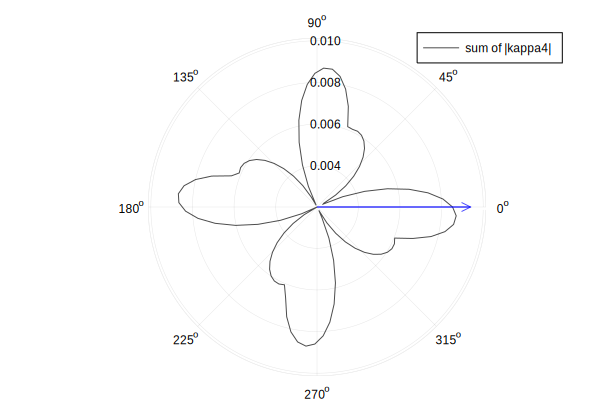

In [36]:
# the direction found by maximize sum of absolute value of free kurtosis
# fail to recover the free component. The reason is that the kurtosis of both 
# components are close to zero. The maximizer depends on the fluctuation
θ_range = range(0, stop = 2π, length = 100)
@time plot(θ -> -neg_abs_sum_free_kurt([cos(θ) sin(θ); -sin(θ) cos(θ)]*X), 
    θ_range, proj=:polar, label="sum of |kappa4|")
y1, y2 = ylims()
plot!([0, 0], [y1, y2], seriestype=:path, proj=:polar, arrow=0.2, color=:blue)

In [37]:
# find the mixing matrix
@time Qest, _ = freecf(Z, obj_type = "ent", mat_type = "rec")

# Qest should estimate the Q, 
# thus inv(Qest)*Q should be close to I
@show pinv(Qest)*Q;

  4.212561 seconds (16.83 M allocations: 1.610 GiB, 7.33% gc time)
pinv(Qest) * Q = [0.743591 0.668051; -0.659384 0.748645]


  2.603767 seconds (16.35 M allocations: 1.300 GiB, 9.34% gc time)


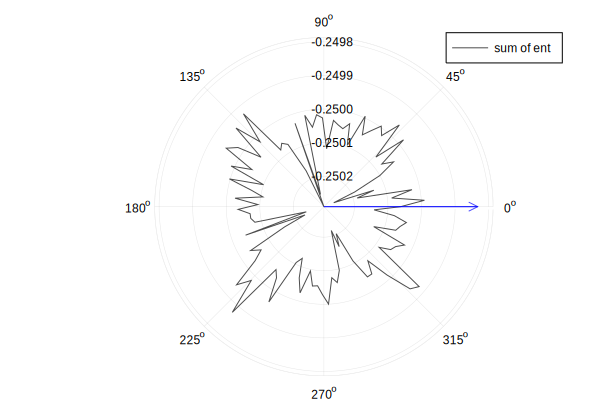

In [38]:
# The direction found by minimize sum of free entropy
# does recover the free component.
# The reason is that free entropys of all direction are close
# the maximizer depends on the fluctuation.
θ_range = range(0, stop = 2π, length = 100)
@time plot(θ -> sum_free_ent([cos(θ) sin(θ); -sin(θ) cos(θ)]*X; mat_type = "rec"), 
    θ_range, proj=:polar, label="sum of ent")
y1, y2 = ylims()
plot!([0, 0], [y1, y2], seriestype=:path, proj=:polar, arrow=0.2, color=:blue)